# Data Visualization Class Note

This is my note about visualization tools from various MOOCs I took. I will constantly update this as I learn more tips and tricks.

* Customizing 1D plots: apply ggplot style, reset style to default, add arrow to annotate a graph, rotate axis, legend
* Plotting 2D arrays: contour plot, 2d histrogram, plot images,  histrogram and cumulative distribution function of a gray scale image, Equalizing an image histogram, Extracting bivariate histograms from a color image.
* Statistical plots with Seaborn: lmplot, residplot, regplot, jointplot, hue, violinplot, striplot, swamplot, pairplot, heatmap
* Analyzing time series: plot data with datetime index, multiple time slices, inset view

## Customizing 1D plots

how to apply ggplot style, add arrow to annotate a graph, rotate axis, legend

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
bach = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
bach.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [9]:
bach.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

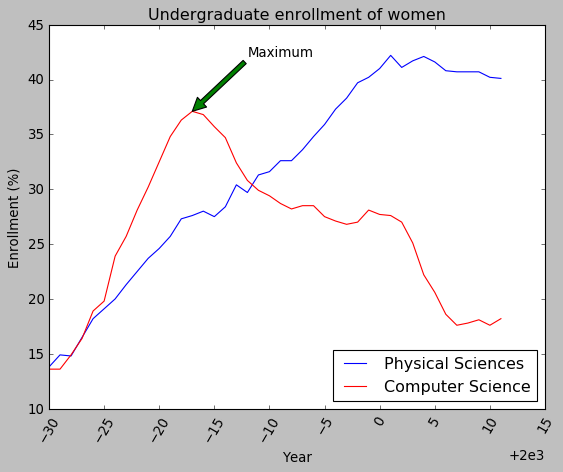

In [91]:
plt.plot(bach.Year, bach['Physical Sciences'],label='Physical Sciences', color='blue')
plt.plot(bach.Year,bach['Computer Science'],label='Computer Science',color='red')
plt.legend(loc='lower right')

cs_max = bach['Computer Science'].max()
yr_max = bach.iloc[bach['Computer Science'].idxmax()].Year

plt.annotate('Maximum',xy=(yr_max,cs_max),xytext=(yr_max+5,cs_max+5),arrowprops=dict(facecolor='green'))


plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

In [21]:
bach['Computer Science'].idxmax()

13

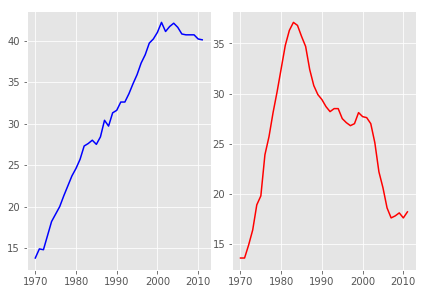

In [28]:
plt.style.use('ggplot')
plt.axes([0.05,0.05,0.425,0.9])
plt.plot(bach.Year, bach['Physical Sciences'], color='blue')
plt.axes([0.525,0.05,0.425,0.9])
plt.plot(bach.Year,bach['Computer Science'],color='red')
plt.show()

Temporary styling

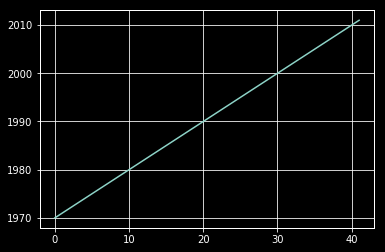

In [88]:
with plt.style.context(('dark_background')):
    plt.plot(bach.Year)

reset style to default

In [92]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

(0, 50)

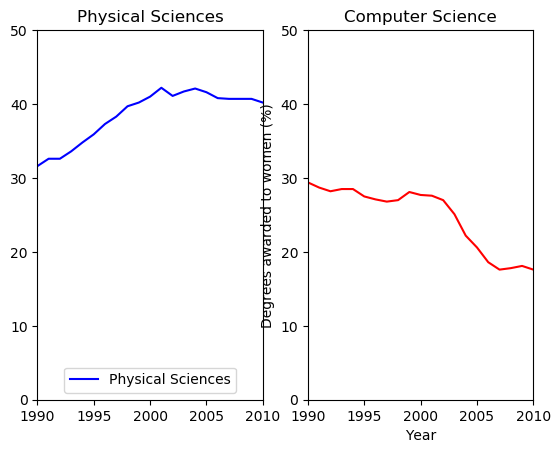

In [93]:
plt.subplot(1,2,1)
plt.plot(bach.Year, bach['Physical Sciences'],label='Physical Sciences', color='blue')
plt.title('Physical Sciences')
plt.axis([1990,2010,0,50])
plt.legend(loc='lower center')

plt.subplot(1,2,2)
plt.plot(bach.Year,bach['Computer Science'],label='Physical Sciences',color='red')
plt.title('Computer Science')
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')
plt.xlim([1990,2010])
plt.ylim((0,50))

## Visualizing 2D array and images

Contour plot, 2d histogram, images, histrogram and cumulative distribution function of a gray scale image, Equalizing an image histogram, Extracting bivariate histograms from a color image.

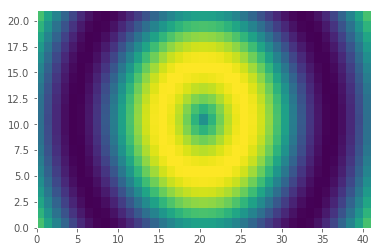

In [31]:
# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

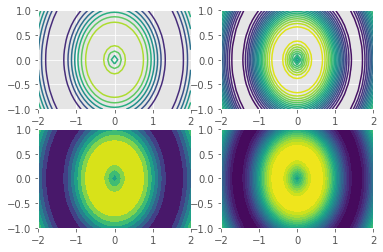

In [32]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X,Y,Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X,Y,Z,20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X,Y,Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20)


In [34]:
auto = pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


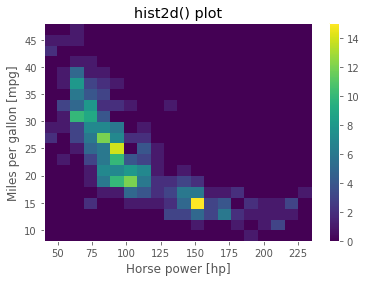

In [35]:
plt.hist2d(auto.hp,auto.mpg,bins=(20,20),range=((40,235),(8,48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

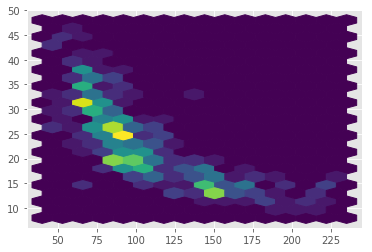

In [36]:
plt.hexbin(auto.hp,auto.mpg,gridsize=(15,12),extent=(40,235,8,48))

In [39]:
img = plt.imread('data/Astronaut-EVA.jpg')

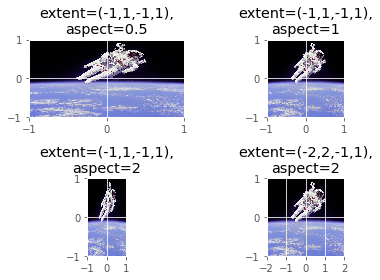

In [40]:
# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img,extent=(-2,2,-1,1), aspect = 2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

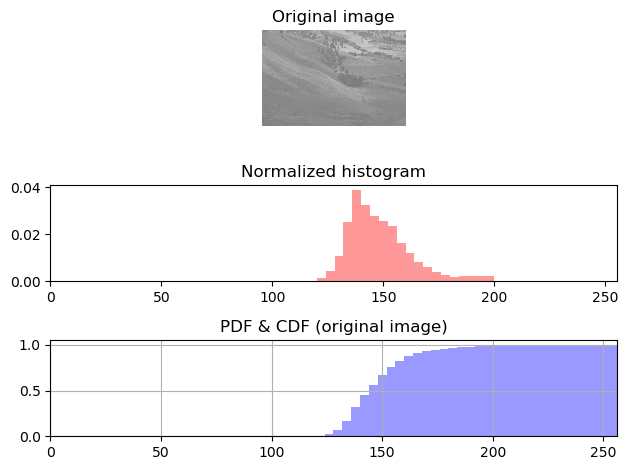

In [101]:
image = plt.imread('data/hawkes_bay.jpg')

plt.subplot(3,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(3,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels,bins=64,range=(0,256),density=True,color='red',alpha=0.4)


# Display a cumulative histogram of the pixels
plt.subplot(3,1,3)
cdf = plt.hist(pixels, bins=64, range=(0,256),
               density=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid(True)
plt.title('PDF & CDF (original image)')
plt.tight_layout()
plt.show()


Equalizing an image histogram. Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. 

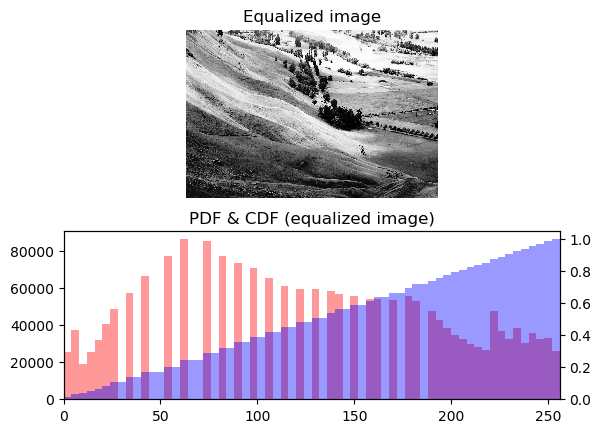

In [113]:
# Load the image into an array: image
image = plt.imread('data/hawkes_bay.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image.astype(int),cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid(False)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid(False)

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.show()


Extracting bivariate histograms from a color image. Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

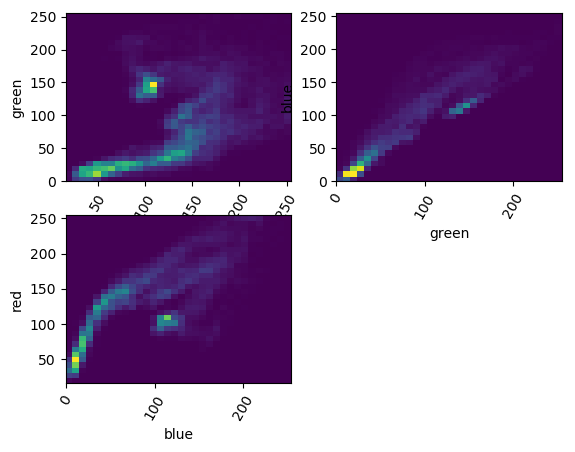

In [115]:
# Load the image into an array: image
image = plt.imread('data/nebula.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid(False) 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(x=red_pixels,y=green_pixels,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(x=green_pixels,y=blue_pixels,bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(x=blue_pixels,y=red_pixels,bins=(32,32))

# Display the plot
plt.show()


## Statistical plots with Seaborn

 lmplot, residplot, regplot, jointplot, hue, violinplot, striplot, swamplot, pairplot, heatmap

In [41]:
import seaborn as sns

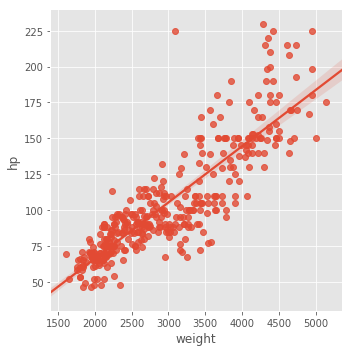

In [75]:
sns.lmplot(x='weight', y='hp', data=auto)


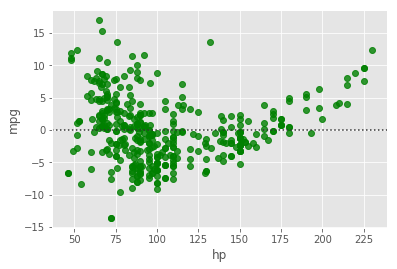

In [46]:
sns.residplot(x='hp', y='mpg', data=auto, color='green')

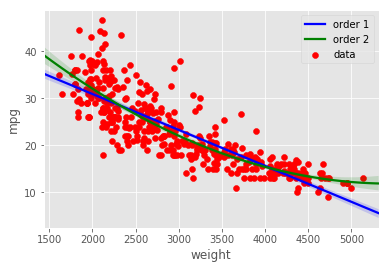

In [47]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1',order =1)

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='green',order=2, label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

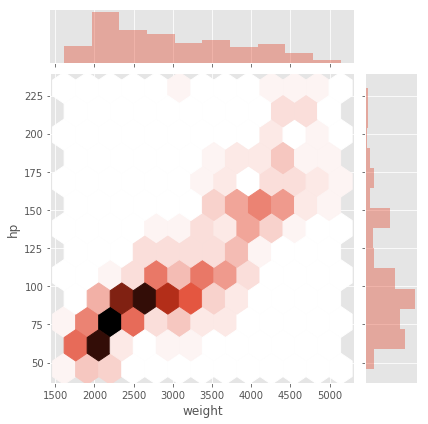

In [57]:
sns.jointplot(x='weight', y='hp', data=auto)

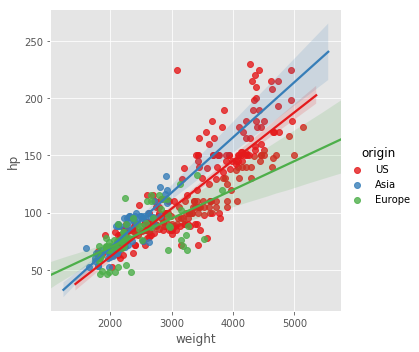

In [48]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight',y='hp',data=auto,hue='origin',palette='Set1')

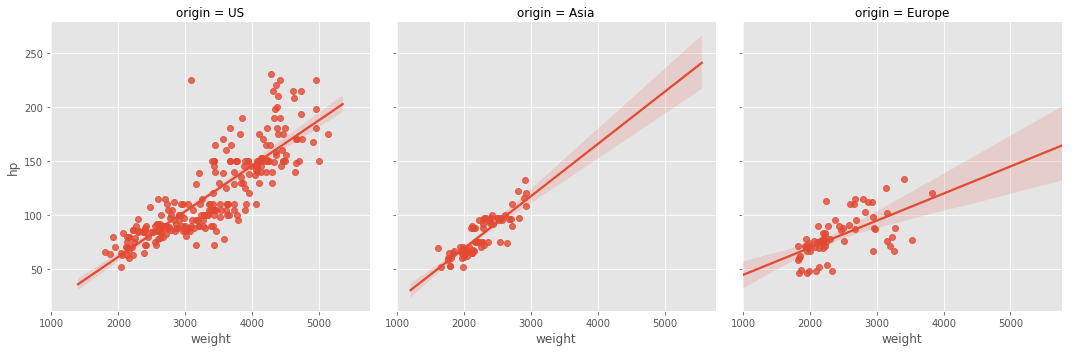

In [74]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight',y='hp',data=auto,col='origin')

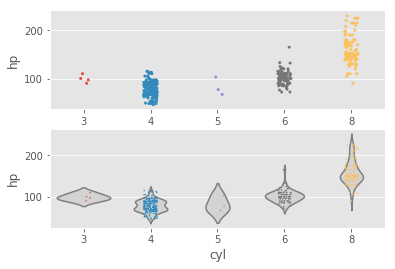

In [56]:
plt.subplot(2,1,1)
# Make a strip plot of 'hp' grouped by 'cyl', using jitter 
sns.stripplot(x='cyl', y='hp', data=auto, size=3, jitter=True)

plt.subplot(2,1,2)
# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
sns.violinplot(x='cyl', y='hp', data=auto,color='lightgray',inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl',y='hp',data=auto,jitter=True,size=1.5)

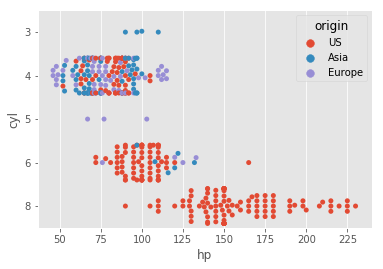

In [54]:
# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
sns.swarmplot(x='hp',y='cyl',data=auto,hue='origin',orient='h')

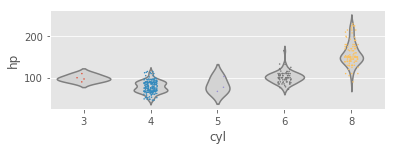

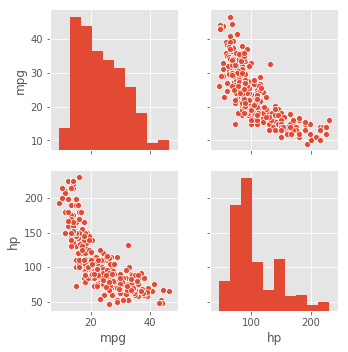

In [63]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto[['mpg','hp','origin']])

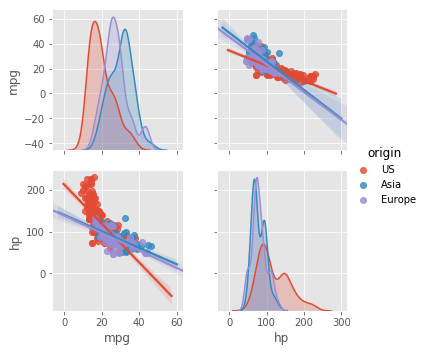

In [62]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto[['mpg','hp','origin']],kind='reg',hue='origin')

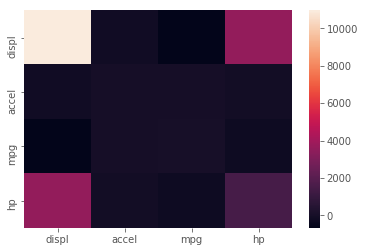

In [70]:
sns.heatmap(auto[['displ','accel','mpg','hp']].cov())

## Analyzing time series

plot data with datetime index, Multiple time slices, inset view

In [184]:
stocks = pd.read_csv('data/stocks.csv',index_col='Date',parse_dates=True)
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [82]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
AAPL    3521 non-null float64
IBM     3521 non-null float64
CSCO    3521 non-null float64
MSFT    3521 non-null float64
dtypes: float64(4)
memory usage: 137.5 KB


(array([733042., 733046., 733050., 733054., 733058., 733062., 733066.,
        733070., 733073.]), <a list of 9 Text xticklabel objects>)

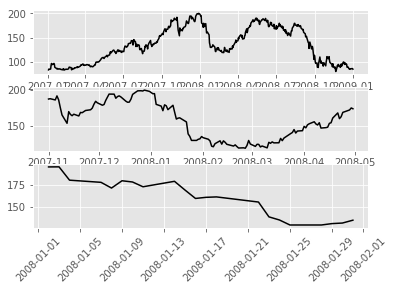

In [86]:
plt.subplot(3,1,1)
view = stocks.AAPL['2007':'2008']
plt.plot(view, color='black')

plt.subplot(3,1,2)
view = stocks.AAPL['2007-11':'2008-04']
plt.plot(view, color='black')

plt.subplot(3,1,3)
view = stocks.AAPL['2008-01']
plt.plot(view, color='black')
plt.xticks(rotation=45)

Plot an inset view

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


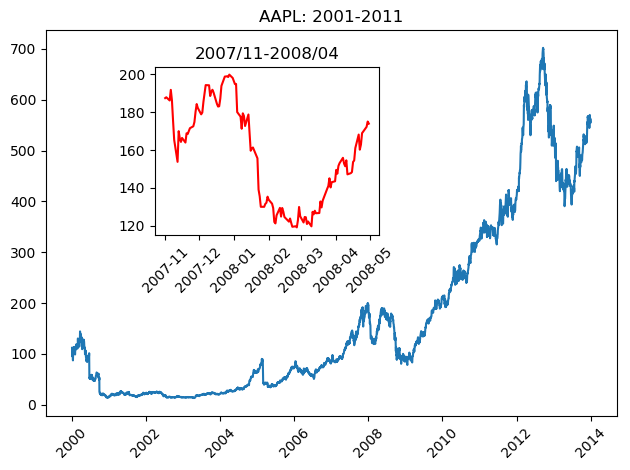

In [186]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = stocks.AAPL['2007-11':'2008-04']

# Plot the entire series 
plt.plot(stocks.AAPL)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.tight_layout()
plt.show()